### Regression analysis

In [2]:
# Global imports and loading the data
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import explained_variance_score, mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split

white_wine_data = pd.read_csv('winequality-white.csv', sep=';')
red_wine_data = pd.read_csv('winequality-red.csv', sep=';')
all_data = pd.concat([white_wine_data, red_wine_data])

A check for missing/null values was performed in the classification notebook and note duplicated here.

In [3]:
def generate_regression_data(wine_type='red', features=None):
    """
    Entry point for creating regression models from a chosen dataset using chosen features.
    If no value is passed for the features argument, all features will be used. 
    """
    if wine_type == 'red':
        data = red_wine_data
    elif wine_type == 'both':
        data = all_data
    elif wine_type == 'white':
        data = white_wine_data
    else:
        raise Exception ('Invalid selection for wine_type')
    y = data['quality']
    # feature=None corresponds to calculating data for all features
    if features:
        X = data[features]
    else:
        X = data.drop(columns='quality')
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)
    reg = LinearRegression().fit(x_train,y_train)
    prediction = reg.predict(x_test)
    coefficients = reg.coef_
    mse = np.mean((prediction, y_test))
    variance = reg.score(x_test, y_test)
    data = dict(
        feature=X,
        regression=reg,
        prediction=prediction,
        coefficients=coefficients,
        mse=mse,
        variance=variance,
        x_test=x_test,
        x_train=x_train,
        y_test=y_test,
        y_train=y_train,
    )
    return data

def print_data(data):
    """
    Nicely formats data produced by generate_regression_data
    """
    print('Coefficients: \n {}'.format(data['coefficients']))
    print('Mean Squared Error: \n{}'.format(data['mse']))
    print('Variance score: \n{}'.format(data['variance']))
    
def plot_regression(data):
    """
    Plots data from regression model using a single feature
    """
    plt.scatter(data['x_test'], data['y_test'], color='green', label='Test Data')
    plt.scatter(data['x_train'], data['y_train'], color='orange', label='Training Data')
    plt.plot(data['x_test'], data['prediction'], color='blue')
    return plt

#### Generate regression model for each feature independently. First for red and white together, then red only, then white only 

In [37]:
def create_and_plot_regression(wine_type):
    features = list(red_wine_data.columns)
    features.remove('quality')
    for feature in features:
        print('{} data for feature: {}'.format(wine_type, feature))
        data = generate_regression_data(wine_type=wine_type, features=[feature])
        print_data(data)
        plot = plot_regression(data)
        plot.xlabel(feature)
        plot.ylabel("Quality")
        plot.legend()
        plot.show()

both data for feature: fixed acidity
Coefficients: 
 [-0.04721922]
Mean Squared Error: 
5.825755561790446
Variance score: 
0.008783923000423632


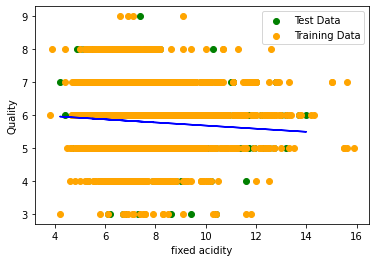

both data for feature: volatile acidity
Coefficients: 
 [-1.45366644]
Mean Squared Error: 
5.8174025153224775
Variance score: 
0.052157497267620645


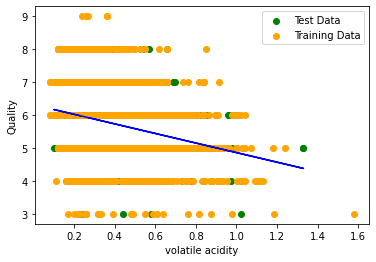

both data for feature: citric acid
Coefficients: 
 [0.49388864]
Mean Squared Error: 
5.808194689782772
Variance score: 
0.008329153531243305


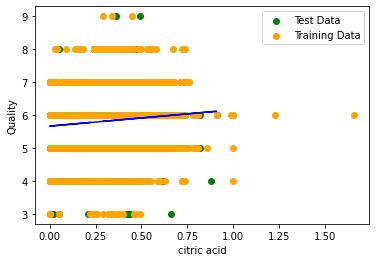

both data for feature: residual sugar
Coefficients: 
 [-0.0054612]
Mean Squared Error: 
5.817018594072619
Variance score: 
0.003306754086718988


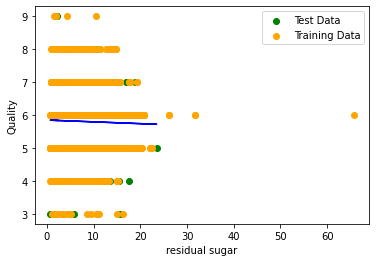

both data for feature: chlorides
Coefficients: 
 [-4.97559469]
Mean Squared Error: 
5.814218973020457
Variance score: 
0.042636027426844914


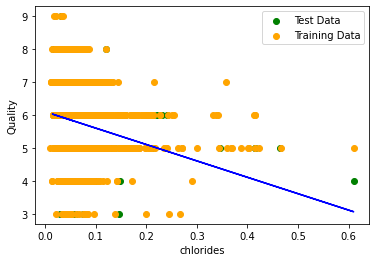

both data for feature: free sulfur dioxide
Coefficients: 
 [0.00302347]
Mean Squared Error: 
5.811560934698873
Variance score: 
-0.00021448916379784855


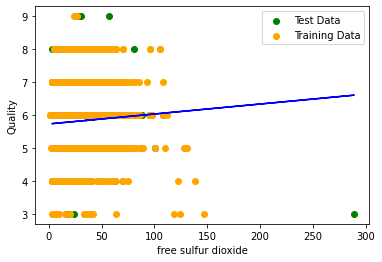

both data for feature: total sulfur dioxide
Coefficients: 
 [-0.00091759]
Mean Squared Error: 
5.817501660577244
Variance score: 
-0.007308790235439178


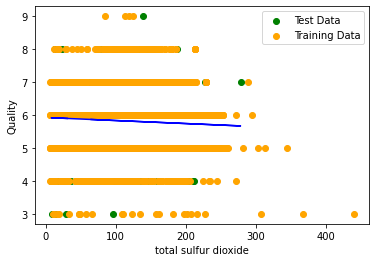

both data for feature: density
Coefficients: 
 [-89.91064419]
Mean Squared Error: 
5.814945950027442
Variance score: 
0.08351196592267207


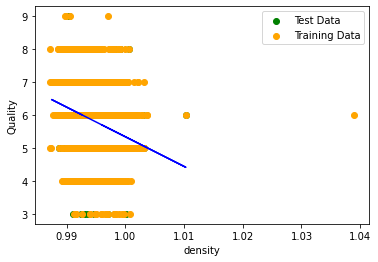

both data for feature: pH
Coefficients: 
 [0.05375216]
Mean Squared Error: 
5.814583618923501
Variance score: 
0.0007508413817043369


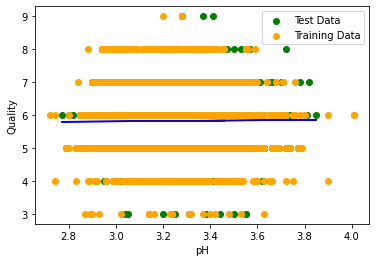

both data for feature: sulphates
Coefficients: 
 [0.25379295]
Mean Squared Error: 
5.827990978021714
Variance score: 
-0.0014429222560548016


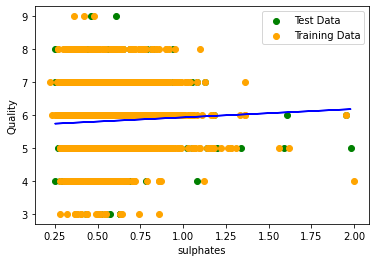

both data for feature: alcohol
Coefficients: 
 [0.31561695]
Mean Squared Error: 
5.826180971059173
Variance score: 
0.22557006204589836


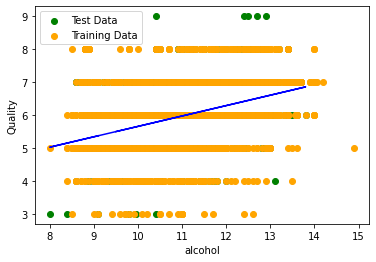

In [39]:
# Red and white wine
print("Regression models for red and white wine")
create_and_plot_regression('both')

red data for feature: fixed acidity
Coefficients: 
 [0.05842325]
Mean Squared Error: 
5.647278237830076
Variance score: 
0.010467536322899318


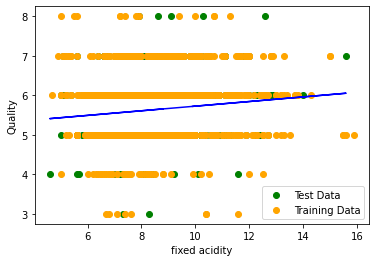

red data for feature: volatile acidity
Coefficients: 
 [-1.84103921]
Mean Squared Error: 
5.6207825873987804
Variance score: 
0.11468038782819878


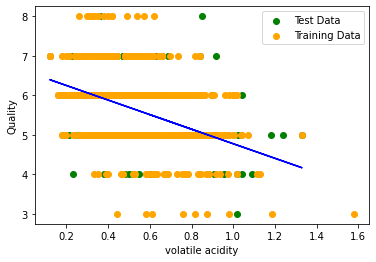

red data for feature: citric acid
Coefficients: 
 [1.01504401]
Mean Squared Error: 
5.635854845820846
Variance score: 
0.018059769519238156


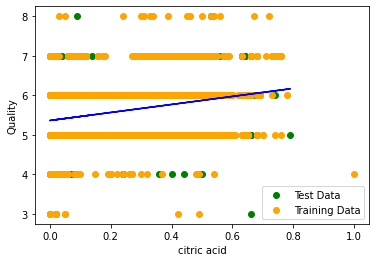

red data for feature: residual sugar
Coefficients: 
 [0.00857174]
Mean Squared Error: 
5.6517362080499165
Variance score: 
-0.003839934512868348


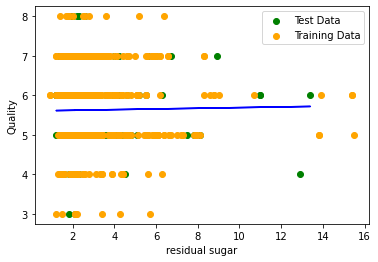

red data for feature: chlorides
Coefficients: 
 [-2.73048753]
Mean Squared Error: 
5.645950271138514
Variance score: 
-0.022986332929235687


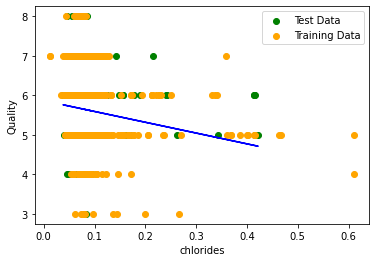

red data for feature: free sulfur dioxide
Coefficients: 
 [-0.00339761]
Mean Squared Error: 
5.62945060685602
Variance score: 
0.004419961211264756


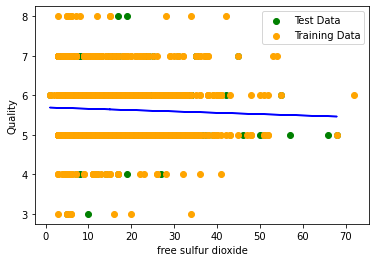

red data for feature: total sulfur dioxide
Coefficients: 
 [-0.00419686]
Mean Squared Error: 
5.635070135011688
Variance score: 
0.0484468952721262


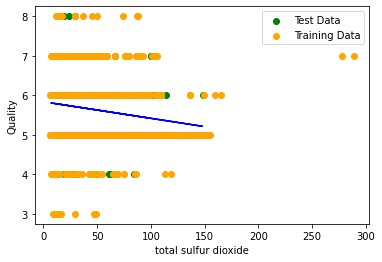

red data for feature: density
Coefficients: 
 [-85.35707219]
Mean Squared Error: 
5.632928337441444
Variance score: 
-0.00436378611890853


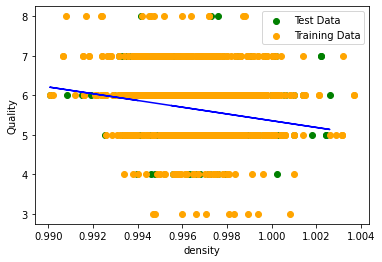

red data for feature: pH
Coefficients: 
 [-0.13802089]
Mean Squared Error: 
5.652159007675917
Variance score: 
0.0044547031416135585


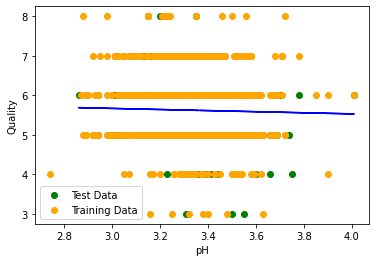

red data for feature: sulphates
Coefficients: 
 [1.29478809]
Mean Squared Error: 
5.634955582167539
Variance score: 
0.027442091465048613


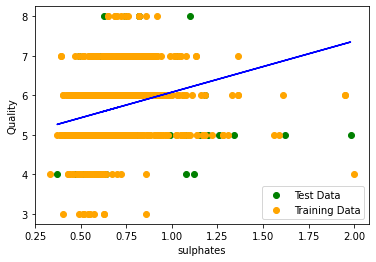

red data for feature: alcohol
Coefficients: 
 [0.37430447]
Mean Squared Error: 
5.642989408454315
Variance score: 
0.1396989042785337


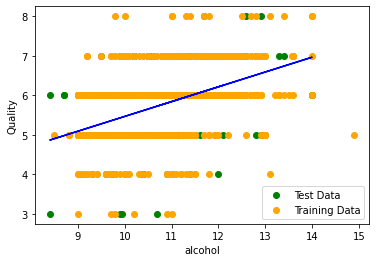

In [40]:
# Red wine only 
print("Regression models for red wine")
create_and_plot_regression('red')

white data for feature: fixed acidity
Coefficients: 
 [-0.10550897]
Mean Squared Error: 
5.874501399208609
Variance score: 
0.021992298032568747


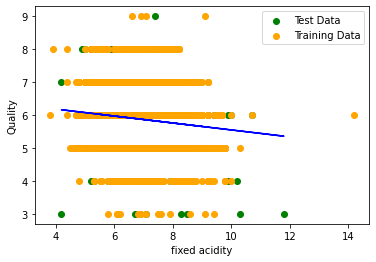

white data for feature: volatile acidity
Coefficients: 
 [-1.7181443]
Mean Squared Error: 
5.872398585817224
Variance score: 
0.03191312065494678


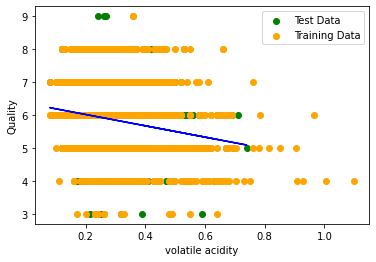

white data for feature: citric acid
Coefficients: 
 [-0.14817904]
Mean Squared Error: 
5.870993104893342
Variance score: 
-0.0025813345863641146


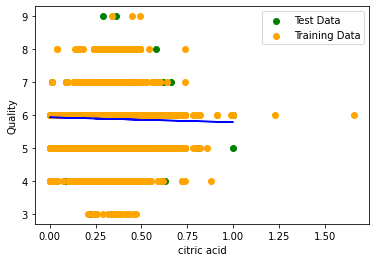

white data for feature: residual sugar
Coefficients: 
 [-0.01559876]
Mean Squared Error: 
5.878978883975402
Variance score: 
0.014830346836370856


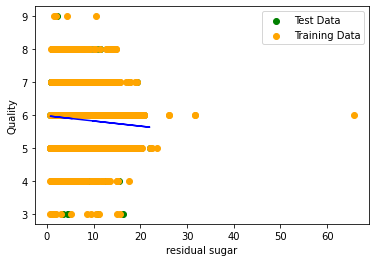

white data for feature: chlorides
Coefficients: 
 [-8.41601567]
Mean Squared Error: 
5.881172424771756
Variance score: 
0.044505634281990725


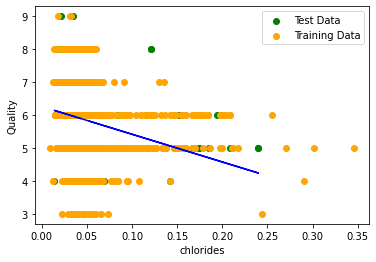

white data for feature: free sulfur dioxide
Coefficients: 
 [0.00054405]
Mean Squared Error: 
5.874270834821995
Variance score: 
-0.0002937160376919046


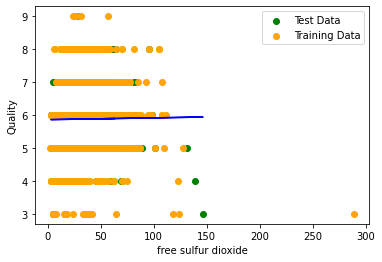

white data for feature: total sulfur dioxide
Coefficients: 
 [-0.00377396]
Mean Squared Error: 
5.875301563105785
Variance score: 
0.021803320398909087


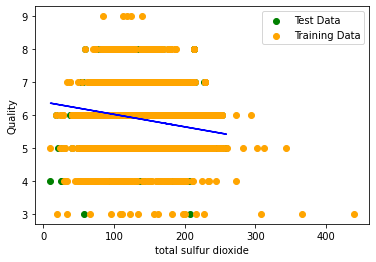

white data for feature: density
Coefficients: 
 [-86.38134589]
Mean Squared Error: 
5.88168287009578
Variance score: 
0.1324597760156191


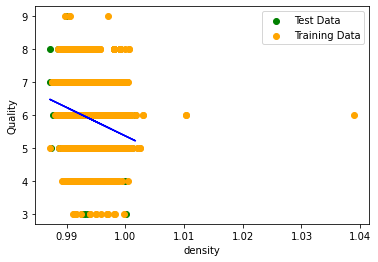

white data for feature: pH
Coefficients: 
 [0.58060082]
Mean Squared Error: 
5.878904923211475
Variance score: 
0.010424080992948226


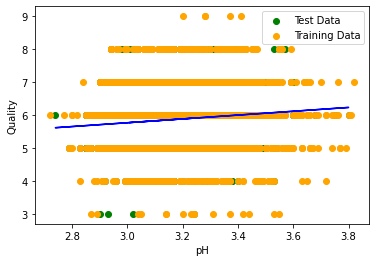

white data for feature: sulphates
Coefficients: 
 [0.4080432]
Mean Squared Error: 
5.859192185543896
Variance score: 
-0.0012926138165445522


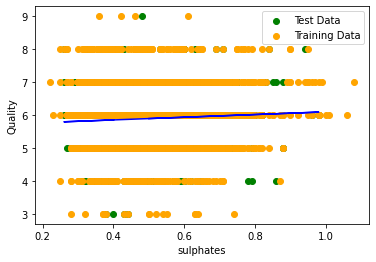

white data for feature: alcohol
Coefficients: 
 [0.31409913]
Mean Squared Error: 
5.878669013820216
Variance score: 
0.18713230282417526


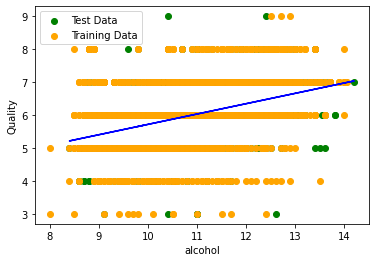

In [41]:
# White wine only
print("Regression models for white wine")
create_and_plot_regression('white')

#### Check our regression models against correlation values

alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


<AxesSubplot:>

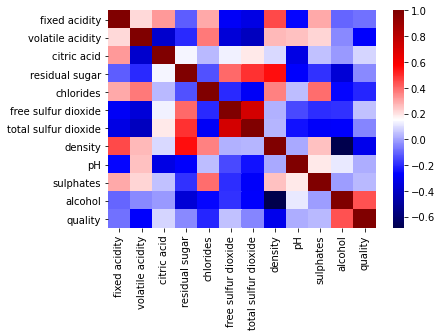

In [30]:
# Red and white wine
print("Correlation values for red and white wine data")
print(all_data.corr()['quality'].drop('quality').sort_values(ascending=False))
sns.heatmap(all_data.corr(), cmap='seismic')

The 3 strongest correlations (alcohol, density, and volatile acidity) match the 3 regression models with the highest variance, which is what we expect.

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

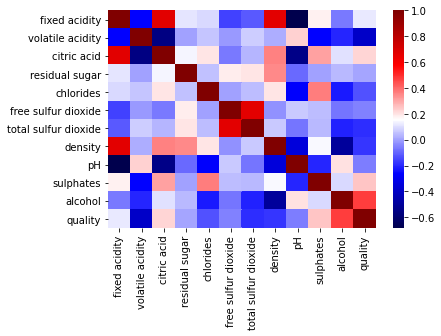

In [32]:
# Red wine only
print("Correlation values for red wine data")
print(red_wine_data.corr()['quality'].drop('quality').sort_values(ascending=False))
sns.heatmap(red_wine_data.corr(), cmap='seismic')

The 3 strongest correlations (alcohol, volatile acidity, and sulphate) match the 3 regression models with the highest variance, which is what we expect.

alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


<AxesSubplot:>

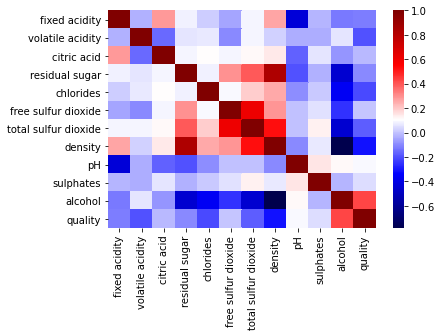

In [33]:
# White wine only
print("Correlation values for white wine data")
print(white_wine_data.corr()['quality'].drop('quality').sort_values(ascending=False))
sns.heatmap(white_wine_data.corr(), cmap='seismic')

The 3 strongest correlations (alcohol, density, and chlorides) match the 3 regression models with the highest variance, which is what we expect.

#### Next, we generate regression models using all features. First for Red and white wine, then red only, then white only.

In [11]:
# Red and white
print("Regression model using all features for red and white wine")
data = generate_regression_data(wine_type='both')
print_data(data)

Coefficients: 
 [ 7.35820589e-02 -1.36131562e+00 -1.05235081e-01  4.48570653e-02
 -3.77312432e-01  5.96666803e-03 -2.54500090e-03 -5.76933263e+01
  4.54396669e-01  7.37831001e-01  2.57634244e-01]
Mean Squared Error: 
5.78886835674815
Variance score: 
0.29115590759433885


The single feature regression model using alcohol had the highest variance, at ~.20. In this case, using all features produces a higher variance than any one feature independently

In [12]:
# Red only
print("Regression model using all features for wine")
data = generate_regression_data(wine_type='red')
print_data(data)

Coefficients: 
 [ 1.53013818e-02 -1.09659827e+00 -1.98517135e-01  3.74086043e-03
 -2.06311732e+00  5.93803935e-03 -3.75442406e-03 -1.09652528e+01
 -4.27268511e-01  9.32010145e-01  2.64854633e-01]
Mean Squared Error: 
5.621721880639745
Variance score: 
0.3889973315228855


The single feature regression model using alcohol had the highest variance, at ~.25. In this case, using all features produces a higher variance than any one feature independently

In [13]:
# White only
print("Regression model using all features for white wine")
data = generate_regression_data(wine_type='white')
print_data(data)

Coefficients: 
 [ 6.84781068e-02 -1.81867279e+00  4.27754352e-02  7.75848317e-02
 -3.64671733e-01  4.55098399e-03 -6.40131320e-04 -1.45068277e+02
  7.08183089e-01  6.37224859e-01  1.99305899e-01]
Mean Squared Error: 
5.857696531455065
Variance score: 
0.26381110651608286


The single feature regression model using alcohol had the highest variance, at ~.22. In this case, using all features produces a higher variance than any one feature independently

#### Next, we will attempt to use a combination of features to create a regression models whose variances are higher than the regression models which use all features. First for red and white wine, then red only, then white only. This could be computationally expensive. To decrease the amount of work, we will only consider features where abs(correlation) >= .1.

In [50]:
import itertools
def find_highest_variance_regression(wine_type, features):
    """
    Given a list of strings representing the column names of features, genereate regression models for 
    all possible combinations of features.
    """
    combos = []
    data_dict = {}
    for l in range(0, len(features)+1):
        for subset in itertools.combinations(both_features, l):
            combos.append(subset)
    for combo in combos:
        data = generate_regression_data(wine_type=wine_type, features=list(combo))
        data_dict[combo] = data
    max_key = max(data_dict, key=lambda tup: data_dict[tup]['variance'])
    return data_dict[max_key], max_key

In [77]:
# Features of red wine + white wine dataset with correlations >=.1
print("Regression models using high correlation features for red and white wine")
both_features = ['alcohol', 'density', 'volatile acidity', 'chlorides']
both_data, features = find_highest_variance_regression('both', both_features)
print_data(both_data)
print("Features used: {}".format(features))

Coefficients: 
 [ 0.32061792 -1.31765202  0.28900045]
Mean Squared Error: 
5.82810319548483
Variance score: 
0.26884604654306277
Features used: ('alcohol', 'volatile acidity', 'chlorides')


In [79]:
# Features of red wine with correlations >=.1
print("Regression models using high correlation features for red wine")
red_features = ['alcohol', 'sulphates', 'citric acid', 'fixed acidity', 'chlorides', 'density', 'total sulfur dioxide', 'volatile acidity']
red_data, red_features = find_highest_variance_regression('red', red_features)
print_data(red_data)
print("Features used: {}".format(red_features))

Coefficients: 
 [ 0.31900663 17.92312009 -1.41746639]
Mean Squared Error: 
5.678713187495981
Variance score: 
0.33708443343582883
Features used: ('alcohol', 'density', 'volatile acidity')


In [78]:
# Features of white wine dataset with correlations >=.1
print("Regression models using high correlation features for white wine")
white_features = ['alcohol', 'density', 'chlorides', 'volatile acidity', 'total sulfur dioxide', 'fixed acidity']
white_data, white_features = find_highest_variance_regression('white', white_features)
print_data(white_data)
print("Features used: {}".format(white_features))

Coefficients: 
 [ 0.38095277 35.94938661 -1.98975851 -1.07340257]
Mean Squared Error: 
5.87229950904838
Variance score: 
0.29975297158948655
Features used: ('alcohol', 'density', 'volatile acidity', 'chlorides')


#### Discussion

It would seem from our analysis that alcohol content is the most important predictor for wine quality. Let's look into that a bit more.

Text(0.5, 0, 'Alcohol')

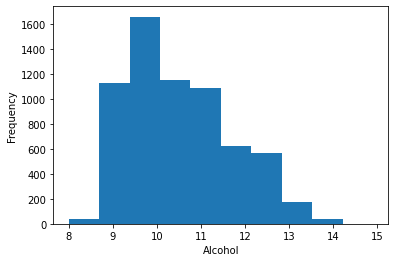

In [81]:
all_data.alcohol.plot(kind='hist')
plt.xlabel("Alcohol")

In [91]:
print("Mean quality score for wines with alcohol content greater than 13%")
print(all_data[all_data['alcohol']>13]['quality'].mean())
print("Mean quality score for all wines")
print(all_data['quality'].mean())
print("Data for wines with alcohol content higher than 14%")
all_data[all_data['alcohol']>14]

Mean quality score for wines with alcohol content greater than 13%
6.688
Mean quality score for all wines
5.818377712790519
Data for wines with alcohol content higher than 14%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3918,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
4503,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5


It is interesting that pH did not come up as relevant in any of our models. While this analysis is not meant to be an exercise in chemistry, that does seem odd. It is also interesting that there's not much discernable difference between the pH of red wine and white wine.

Average pH of all wine: 3.2185008465445586


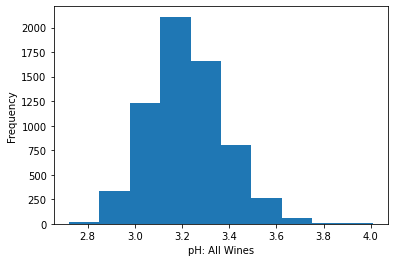

In [100]:
all_data.pH.plot(kind='hist')
plt.xlabel("pH: All Wines")
print("Average pH of all wine: {}".format(all_data.pH.mean()))

Average pH of red wine: 3.3111131957473416


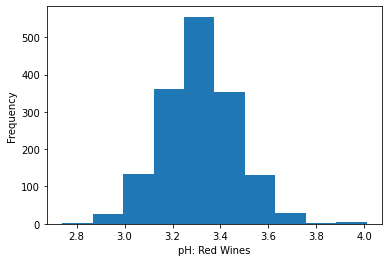

In [101]:
red_wine_data.pH.plot(kind='hist')
plt.xlabel("pH: Red Wines")
print("Average pH of red wine: {}".format(red_wine_data.pH.mean()))

Average pH of white wine: 3.1882666394446715


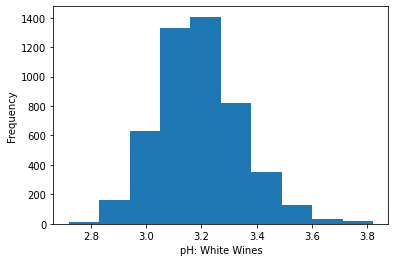

In [102]:
white_wine_data.pH.plot(kind='hist')
plt.xlabel("pH: White Wines")
print("Average pH of white wine: {}".format(white_wine_data.pH.mean()))

Density is negatively correlated with quality in red and white wines, but it seems more important in white than red. See coefficients in the regression models using all features

Text(0.5, 0, 'Density: White Wines')

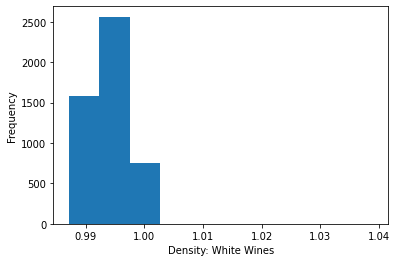

In [112]:
white_wine_data.density.plot(kind='hist')
plt.xlabel("Density: White Wines")

Text(0.5, 0, 'Density: Red Wines')

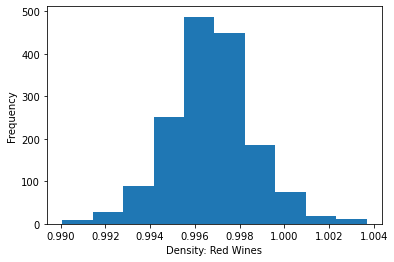

In [113]:
red_wine_data.density.plot(kind='hist')
plt.xlabel("Density: Red Wines")

In [114]:
print("Average quality of white wines with density >1")
print(white_wine_data[white_wine_data['density']>1]['quality'].mean())

Average quality of white wines with density >1
5.552631578947368


In [115]:
print("Average quality of white wines with density <.995")
print(white_wine_data[white_wine_data['density']<.995]['quality'].mean())

Average quality of white wines with density <.995
6.042954767328344
